In [1]:
%cd ../
%pwd

/Users/eloidieme/Documents/cours-kth/DeepL/AS1


'/Users/eloidieme/Documents/cours-kth/DeepL/AS1'

In [2]:
%matplotlib inline

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from src.main import *

In [4]:
np.random.seed(400)

In [5]:
splits_norm = normalize_splits(make_splits())
X_train, Y_train, y_train = splits_norm["train"]
X_val, Y_val, y_val = splits_norm["validation"]
X_test, Y_test, y_test = splits_norm["test"]
Y_train.shape

(10, 10000)

In [6]:
W, b = init_params()

In [21]:
P = evaluate_classifier_bce(X_train, W, b)
grad_loss_P = (-Y_train.T / P.T + (1 - Y_train.T) / (1 - P.T)) / K
grad_P_S = P.T * (1 - P.T)
grad_loss_S = grad_loss_P * grad_P_S

grad_W = np.dot(X_train, grad_loss_S).T
grad_b = np.reshape(np.sum(grad_loss_S, axis=0), (-1, 1))

[grad_W.shape, grad_b.shape]

[(10, 3072), (10, 1)]

In [22]:
gW, gb = compute_gradients(X_train, Y_train, W, b)
[gW.shape, gb.shape]

[(10, 3072), (10, 1)]

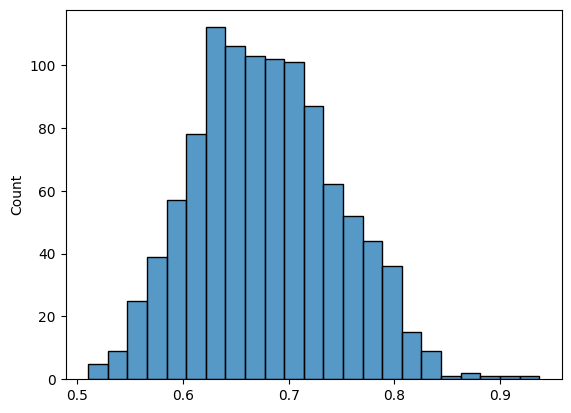

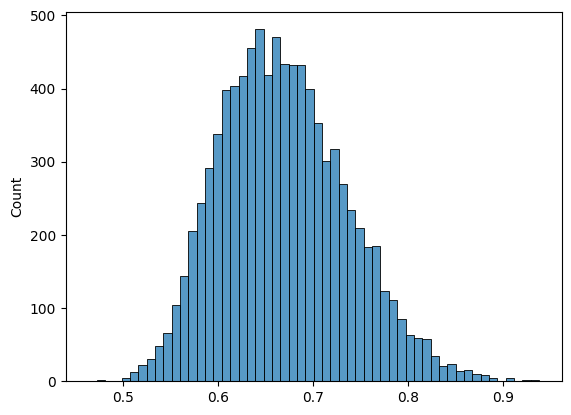

In [7]:
probability_histogram(X_train, y_train, W, b, bce=True)

In [7]:
batch_size = 32
n_features = 20
validate_gradient(X_train[:n_features, :batch_size], Y_train[:n_features, :batch_size], W[:, :n_features], b, 0.7)

True

In [27]:
W_train, b_train, train_costs, val_costs = mini_batch_gd(X_train, Y_train, {"n_batch": 100, "eta": .001, "n_epochs": 40}, W, b, 0.0, validation=(X_val, Y_val))

Epoch 1/40


100%|██████████| 100/100 [00:04<00:00, 21.24it/s]


	 * Train loss: 1.9764897654430447
	 * Validation loss: 2.001506239755246
Epoch 2/40


100%|██████████| 100/100 [00:04<00:00, 21.24it/s]


	 * Train loss: 1.8983388346682504
	 * Validation loss: 1.9336708576985628
Epoch 3/40


100%|██████████| 100/100 [00:04<00:00, 23.02it/s]


	 * Train loss: 1.8543096562023722
	 * Validation loss: 1.9002970861273645
Epoch 4/40


100%|██████████| 100/100 [00:04<00:00, 23.26it/s]


	 * Train loss: 1.8264871918446843
	 * Validation loss: 1.8799554731703858
Epoch 5/40


100%|██████████| 100/100 [00:04<00:00, 20.78it/s]


	 * Train loss: 1.802498679367177
	 * Validation loss: 1.866316238196737
Epoch 6/40


100%|██████████| 100/100 [00:04<00:00, 23.36it/s]


	 * Train loss: 1.7863197659877263
	 * Validation loss: 1.8558351420515407
Epoch 7/40


100%|██████████| 100/100 [00:03<00:00, 26.06it/s]


	 * Train loss: 1.772054325330598
	 * Validation loss: 1.8487320873487476
Epoch 8/40


100%|██████████| 100/100 [00:04<00:00, 24.02it/s]


	 * Train loss: 1.7589475373307637
	 * Validation loss: 1.842109357833054
Epoch 9/40


100%|██████████| 100/100 [00:04<00:00, 24.59it/s]


	 * Train loss: 1.7520880364204263
	 * Validation loss: 1.839581928335928
Epoch 10/40


100%|██████████| 100/100 [00:04<00:00, 23.71it/s]


	 * Train loss: 1.739121111864483
	 * Validation loss: 1.8303972842283034
Epoch 11/40


100%|██████████| 100/100 [00:04<00:00, 21.80it/s]


	 * Train loss: 1.730625145094024
	 * Validation loss: 1.8289377003579925
Epoch 12/40


100%|██████████| 100/100 [00:03<00:00, 28.00it/s]


	 * Train loss: 1.723843257932197
	 * Validation loss: 1.8252916643796158
Epoch 13/40


100%|██████████| 100/100 [00:04<00:00, 24.81it/s]


	 * Train loss: 1.7176901866451555
	 * Validation loss: 1.8243215641779462
Epoch 14/40


100%|██████████| 100/100 [00:04<00:00, 22.42it/s]


	 * Train loss: 1.7095513263667266
	 * Validation loss: 1.8177769380455917
Epoch 15/40


100%|██████████| 100/100 [00:03<00:00, 25.73it/s]


	 * Train loss: 1.7057003592717934
	 * Validation loss: 1.8197772728630734
Epoch 16/40


100%|██████████| 100/100 [00:04<00:00, 23.93it/s]


	 * Train loss: 1.698051525533489
	 * Validation loss: 1.814597069859745
Epoch 17/40


100%|██████████| 100/100 [00:03<00:00, 26.16it/s]


	 * Train loss: 1.6921579203290618
	 * Validation loss: 1.81245877696991
Epoch 18/40


100%|██████████| 100/100 [00:03<00:00, 25.83it/s]


	 * Train loss: 1.6896298976391144
	 * Validation loss: 1.813883010219278
Epoch 19/40


100%|██████████| 100/100 [00:03<00:00, 25.40it/s]


	 * Train loss: 1.6829233421421086
	 * Validation loss: 1.808774443955987
Epoch 20/40


100%|██████████| 100/100 [00:03<00:00, 25.63it/s]


	 * Train loss: 1.6787036406965414
	 * Validation loss: 1.8081269414028782
Epoch 21/40


100%|██████████| 100/100 [00:04<00:00, 23.13it/s]


	 * Train loss: 1.67351597706041
	 * Validation loss: 1.805216909317043
Epoch 22/40


100%|██████████| 100/100 [00:04<00:00, 24.49it/s]


	 * Train loss: 1.6696328603498112
	 * Validation loss: 1.805738441584009
Epoch 23/40


100%|██████████| 100/100 [00:03<00:00, 25.99it/s]


	 * Train loss: 1.6653414306495962
	 * Validation loss: 1.802504889263151
Epoch 24/40


100%|██████████| 100/100 [00:03<00:00, 26.28it/s]


	 * Train loss: 1.6619635498211311
	 * Validation loss: 1.800083124981128
Epoch 25/40


100%|██████████| 100/100 [00:03<00:00, 26.31it/s]


	 * Train loss: 1.661100127507127
	 * Validation loss: 1.8039097764544954
Epoch 26/40


100%|██████████| 100/100 [00:03<00:00, 26.91it/s]


	 * Train loss: 1.6540393194309826
	 * Validation loss: 1.7991810429274873
Epoch 27/40


100%|██████████| 100/100 [00:03<00:00, 25.13it/s]


	 * Train loss: 1.652360887602609
	 * Validation loss: 1.799620918499083
Epoch 28/40


100%|██████████| 100/100 [00:03<00:00, 25.07it/s]


	 * Train loss: 1.6472339542138958
	 * Validation loss: 1.7978441828118754
Epoch 29/40


100%|██████████| 100/100 [00:04<00:00, 22.49it/s]


	 * Train loss: 1.6434510845914694
	 * Validation loss: 1.7951540021208618
Epoch 30/40


100%|██████████| 100/100 [00:04<00:00, 24.85it/s]


	 * Train loss: 1.64371957127287
	 * Validation loss: 1.7978583919584796
Epoch 31/40


100%|██████████| 100/100 [00:04<00:00, 21.74it/s]


	 * Train loss: 1.6386120369292447
	 * Validation loss: 1.7989851435590103
Epoch 32/40


100%|██████████| 100/100 [00:05<00:00, 18.17it/s]


	 * Train loss: 1.6366417028459355
	 * Validation loss: 1.7978107715703067
Epoch 33/40


100%|██████████| 100/100 [00:03<00:00, 26.91it/s]


	 * Train loss: 1.6330863603343477
	 * Validation loss: 1.7978556990709822
Epoch 34/40


100%|██████████| 100/100 [00:03<00:00, 26.08it/s]


	 * Train loss: 1.6306634414002361
	 * Validation loss: 1.7975955933617218
Epoch 35/40


100%|██████████| 100/100 [00:03<00:00, 27.47it/s]


	 * Train loss: 1.6270024161201913
	 * Validation loss: 1.7952222608636443
Epoch 36/40


100%|██████████| 100/100 [00:03<00:00, 28.68it/s]


	 * Train loss: 1.6273841422661819
	 * Validation loss: 1.7976991127313784
Epoch 37/40


100%|██████████| 100/100 [00:04<00:00, 22.06it/s]


	 * Train loss: 1.6231382426453291
	 * Validation loss: 1.7964150196198259
Epoch 38/40


100%|██████████| 100/100 [00:04<00:00, 22.58it/s]


	 * Train loss: 1.6203813280335304
	 * Validation loss: 1.7955266320949785
Epoch 39/40


100%|██████████| 100/100 [00:04<00:00, 24.57it/s]


	 * Train loss: 1.6200006488555807
	 * Validation loss: 1.7960682041136076
Epoch 40/40


100%|██████████| 100/100 [00:03<00:00, 25.61it/s]


	 * Train loss: 1.6153643890454157
	 * Validation loss: 1.7930894437472602


In [30]:
W_train, b_train, train_costs, val_costs = mini_batch_gd_bce(X_train, Y_train, {"n_batch": 100, "eta": .001, "n_epochs": 40}, W, b, 0.0, validation=(X_val, Y_val))

Epoch 1/40


100%|██████████| 100/100 [00:03<00:00, 25.85it/s]


	 * Train loss: 0.5530284380967667
	 * Validation loss: 0.557693324971143
Epoch 2/40


100%|██████████| 100/100 [00:03<00:00, 25.01it/s]


	 * Train loss: 0.47695036599396456
	 * Validation loss: 0.4875231413393145
Epoch 3/40


100%|██████████| 100/100 [00:03<00:00, 25.57it/s]


	 * Train loss: 0.4137827852022276
	 * Validation loss: 0.4239241283826992
Epoch 4/40


100%|██████████| 100/100 [00:03<00:00, 28.07it/s]


	 * Train loss: 0.37842519096482613
	 * Validation loss: 0.39214574142056735
Epoch 5/40


100%|██████████| 100/100 [00:03<00:00, 26.83it/s]


	 * Train loss: 0.3481213215817375
	 * Validation loss: 0.36215040834329965
Epoch 6/40


100%|██████████| 100/100 [00:03<00:00, 25.46it/s]


	 * Train loss: 0.32909622627600366
	 * Validation loss: 0.34389343945550843
Epoch 7/40


100%|██████████| 100/100 [00:03<00:00, 26.83it/s]


	 * Train loss: 0.31484263139533863
	 * Validation loss: 0.33048405252562146
Epoch 8/40


100%|██████████| 100/100 [00:03<00:00, 27.19it/s]


	 * Train loss: 0.3089277889761419
	 * Validation loss: 0.3267708015250872
Epoch 9/40


100%|██████████| 100/100 [00:03<00:00, 26.89it/s]


	 * Train loss: 0.29544200996525155
	 * Validation loss: 0.3146506946218087
Epoch 10/40


100%|██████████| 100/100 [00:03<00:00, 26.36it/s]


	 * Train loss: 0.2833473762345526
	 * Validation loss: 0.30416157784270925
Epoch 11/40


100%|██████████| 100/100 [00:03<00:00, 27.30it/s]


	 * Train loss: 0.2793906842928535
	 * Validation loss: 0.3015434833524756
Epoch 12/40


100%|██████████| 100/100 [00:03<00:00, 25.81it/s]


	 * Train loss: 0.2721622375840385
	 * Validation loss: 0.29536508490898095
Epoch 13/40


100%|██████████| 100/100 [00:03<00:00, 27.73it/s]


	 * Train loss: 0.2713004599456799
	 * Validation loss: 0.2960643740549189
Epoch 14/40


100%|██████████| 100/100 [00:03<00:00, 27.89it/s]


	 * Train loss: 0.2662036145607306
	 * Validation loss: 0.29217665799743026
Epoch 15/40


100%|██████████| 100/100 [00:03<00:00, 27.16it/s]


	 * Train loss: 0.26559226243423595
	 * Validation loss: 0.2921798211912996
Epoch 16/40


100%|██████████| 100/100 [00:03<00:00, 27.76it/s]


	 * Train loss: 0.25985769852371404
	 * Validation loss: 0.28831124011582143
Epoch 17/40


100%|██████████| 100/100 [00:03<00:00, 27.51it/s]


	 * Train loss: 0.25886149850126683
	 * Validation loss: 0.287010401598721
Epoch 18/40


100%|██████████| 100/100 [00:03<00:00, 27.12it/s]


	 * Train loss: 0.25876185837458326
	 * Validation loss: 0.2889554017976156
Epoch 19/40


100%|██████████| 100/100 [00:03<00:00, 25.11it/s]


	 * Train loss: 0.25402052842290695
	 * Validation loss: 0.2844431219076592
Epoch 20/40


100%|██████████| 100/100 [00:03<00:00, 26.75it/s]


	 * Train loss: 0.2527708960660906
	 * Validation loss: 0.2845385438036279
Epoch 21/40


100%|██████████| 100/100 [00:03<00:00, 26.82it/s]


	 * Train loss: 0.2512591587450202
	 * Validation loss: 0.28390642704069974
Epoch 22/40


100%|██████████| 100/100 [00:03<00:00, 27.46it/s]


	 * Train loss: 0.2505732273642626
	 * Validation loss: 0.2844191240250217
Epoch 23/40


100%|██████████| 100/100 [00:03<00:00, 26.17it/s]


	 * Train loss: 0.2496939805543343
	 * Validation loss: 0.28422269135205996
Epoch 24/40


100%|██████████| 100/100 [00:03<00:00, 26.31it/s]


	 * Train loss: 0.24560558187318662
	 * Validation loss: 0.28030493924344463
Epoch 25/40


100%|██████████| 100/100 [00:04<00:00, 24.29it/s]


	 * Train loss: 0.24492032839734357
	 * Validation loss: 0.28124288204700093
Epoch 26/40


100%|██████████| 100/100 [00:04<00:00, 22.75it/s]


	 * Train loss: 0.24610990504641828
	 * Validation loss: 0.2842131813227433
Epoch 27/40


100%|██████████| 100/100 [00:04<00:00, 23.97it/s]


	 * Train loss: 0.24267032725425908
	 * Validation loss: 0.2802417422521111
Epoch 28/40


100%|██████████| 100/100 [00:03<00:00, 25.08it/s]


	 * Train loss: 0.24375750272904723
	 * Validation loss: 0.28215827315474123
Epoch 29/40


100%|██████████| 100/100 [00:03<00:00, 26.27it/s]


	 * Train loss: 0.2426611021466451
	 * Validation loss: 0.28233401901740524
Epoch 30/40


100%|██████████| 100/100 [00:03<00:00, 27.19it/s]


	 * Train loss: 0.24179135100713617
	 * Validation loss: 0.2825352713660584
Epoch 31/40


100%|██████████| 100/100 [00:03<00:00, 27.70it/s]


	 * Train loss: 0.23926102683331585
	 * Validation loss: 0.2804199031789537
Epoch 32/40


100%|██████████| 100/100 [00:03<00:00, 27.12it/s]


	 * Train loss: 0.23924723444541537
	 * Validation loss: 0.2814862903477095
Epoch 33/40


100%|██████████| 100/100 [00:03<00:00, 25.95it/s]


	 * Train loss: 0.23750777465736098
	 * Validation loss: 0.2800515509330374
Epoch 34/40


100%|██████████| 100/100 [00:03<00:00, 26.60it/s]


	 * Train loss: 0.23746850533620784
	 * Validation loss: 0.2813324479331205
Epoch 35/40


100%|██████████| 100/100 [00:03<00:00, 26.72it/s]


	 * Train loss: 0.23891703035165057
	 * Validation loss: 0.2831802687582198
Epoch 36/40


100%|██████████| 100/100 [00:03<00:00, 25.53it/s]


	 * Train loss: 0.23683376397275316
	 * Validation loss: 0.28142571091357965
Epoch 37/40


100%|██████████| 100/100 [00:03<00:00, 27.91it/s]


	 * Train loss: 0.23418943919248433
	 * Validation loss: 0.2801402081700609
Epoch 38/40


100%|██████████| 100/100 [00:04<00:00, 23.76it/s]


	 * Train loss: 0.23382629993859996
	 * Validation loss: 0.28059436635767304
Epoch 39/40


100%|██████████| 100/100 [00:03<00:00, 26.83it/s]


	 * Train loss: 0.23668886981044407
	 * Validation loss: 0.284404635767909
Epoch 40/40


100%|██████████| 100/100 [00:03<00:00, 25.54it/s]


	 * Train loss: 0.23491579726671455
	 * Validation loss: 0.28287685088022396


In [21]:
compute_accuracy_bce(X_test, y_test, W_train, b_train)

0.3546

In [22]:
def probability_histogram(X, y, W, b, bce=True):
	if bce:
		P = evaluate_classifier_bce(X, W, b)
	else:
		P = evaluate_classifier(X, W, b)
	y_pred = np.argmax(P, axis=0)
	probas_correct = np.max(P[:, y == y_pred], axis=0)
	probas_incorrect = np.max(P[:, y != y_pred], axis=0)
	sns.histplot(probas_correct)
	plt.title("Correctly classified samples")
	plt.show()
	sns.histplot(probas_incorrect)
	plt.title("Incorrectly classified samples")
	plt.show()

	

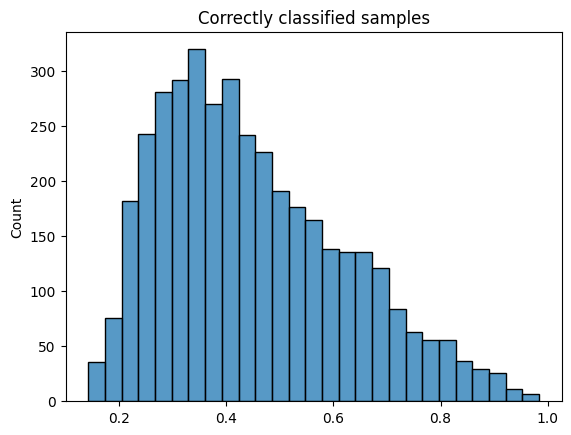

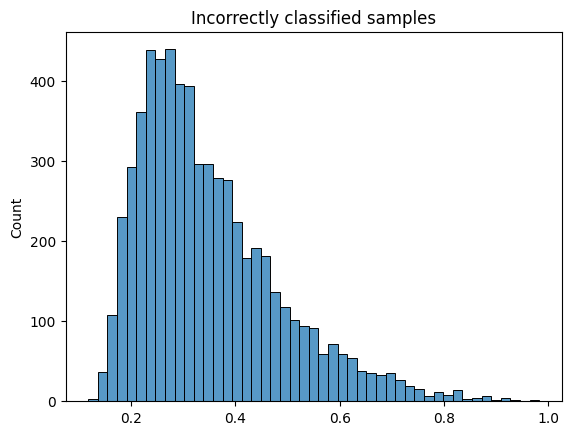

In [28]:
probability_histogram(X_test, y_test, W_train, b_train, bce=False)

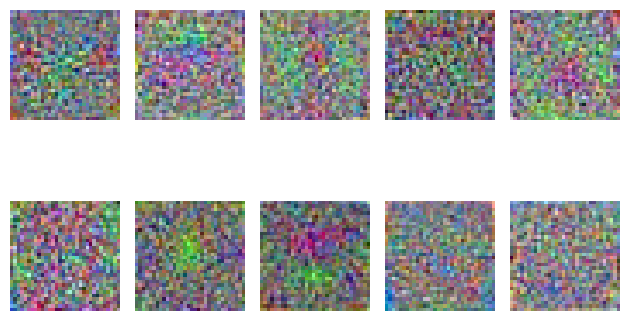

In [26]:
montage(W_train, nrows=2, savepath=f"reports/images/learned_weights_mbce.png", show=False)

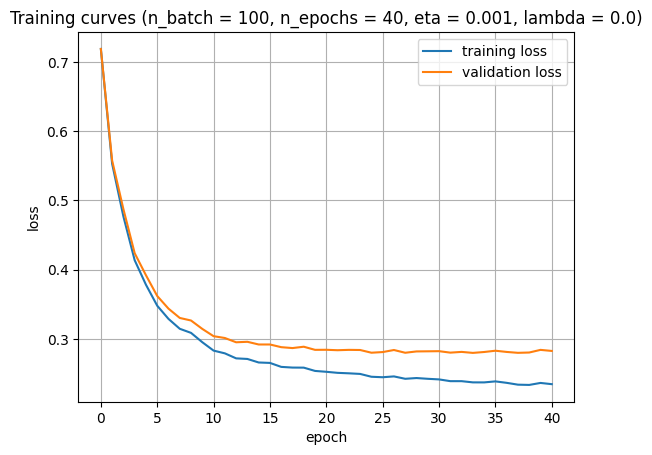

In [31]:
gd_params = {"n_batch": 100, "eta": .001, "n_epochs": 40}
plt.plot(np.arange(0, 41), train_costs, label="training loss")
plt.plot(np.arange(0, 41), val_costs, label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title(f"Training curves (n_batch = {gd_params['n_batch']}, n_epochs = {gd_params['n_epochs']}, eta = {gd_params['eta']}, lambda = 0.0)")
plt.grid()

In [6]:
splits_norm = normalize_splits(make_splits())
X_train, Y_train, y_train = splits_norm["train"]
X_val, Y_val, y_val = splits_norm["validation"]
X_test, Y_test, y_test = splits_norm["test"]

grid = {
    "n_batch": [1000],
    "eta": [1e-4],
    "lamda": [0.0]
}

grid_res = grid_search(X_train, Y_train, X_val, Y_val, y_val, grid, n_epochs=2)
with open('reports/logs/grid_search_test.json', 'w+') as f:
    json.dump(grid_res[1], f)
print(f"Best accuracy: {grid_res[1][-1][grid_res[0]]}")

Epoch 1/2


100%|██████████| 10/10 [00:00<00:00, 20.96it/s]


	 * Train loss: 2.37568827580306
	 * Validation loss: 2.3746943167656887
Epoch 2/2


100%|██████████| 10/10 [00:00<00:00, 21.72it/s]


	 * Train loss: 2.354970429676941
	 * Validation loss: 2.3548417546250118
Best accuracy: 0.1203
